In [1]:
import sys
import os

import numpy as np
from numpy import save
from numpy import load
import random
import pandas as pd

from glob import glob
import seaborn as sns
from matplotlib import pylab as plt

from scipy.spatial.distance import squareform
from scipy.stats import ttest_ind

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

sns.set_style('ticks')
sns.set_context('talk')

%run Funx_Simon.py
%run Classifier_Funx.py

# Load Data

#  Mouse #513 day 1

In [2]:
FOLDER_PATH_plane_0 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_1/Mouse#513/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_1/Mouse#513/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_1/Mouse#513/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day1_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day1_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day1_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)


In [3]:
filteredDataArray0.shape

(39, 20, 2, 100)

#  Mouse #513 day 2

In [4]:
FOLDER_PATH_plane_0 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_2/Mouse#513/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_2/Mouse#513/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_2/Mouse#513/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray0 = filteredDataArray0.transpose(2,1,0,3)
filteredDataArray1 = filteredDataArray1.transpose(2,1,0,3)
filteredDataArray2 = filteredDataArray2.transpose(2,1,0,3)
filteredDataArray_Day2_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day2_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day2_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)


#  Mouse #513 day 3

In [5]:
FOLDER_PATH_plane_0 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_3/Mouse#513/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_3/Mouse#513/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_3/Mouse#513/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray0 = filteredDataArray0.transpose(2,1,0,3)
filteredDataArray1 = filteredDataArray1.transpose(2,1,0,3)
filteredDataArray2 = filteredDataArray2.transpose(2,1,0,3)
filteredDataArray_Day3_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day3_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day3_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)


#  Mouse #514 day 1

In [6]:
FOLDER_PATH_plane_0 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_1/Mouse#514/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_1/Mouse#514/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_1/Mouse#514/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day1_514= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day1_514 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day1_514= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

#  Mouse #514 day 2

In [7]:
FOLDER_PATH_plane_0 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_2/Mouse#514/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_2/Mouse#514/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_2/Mouse#514/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day2_514= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day2_514 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day2_514= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

#  Mouse #514 day 3

In [8]:
FOLDER_PATH_plane_0 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_3/Mouse#514/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_3/Mouse#514/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/Extreme Pro/DATA/2P/GNG/Analysis/Day_3/Mouse#514/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day3_514= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day3_514 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day3_514= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Remove trial excess to concatenate both mice

In [9]:
DataArray_Green_Day1_514 = DataArray_Green_Day1_514[:,0:20,:,:]
DataArray_Red_Day1_514 = DataArray_Red_Day1_514[:,0:20,:,:]

DataArray_Green_Day2_514 = DataArray_Green_Day2_514[:,0:16,:,:]
DataArray_Red_Day2_514 = DataArray_Red_Day2_514[:,0:16,:,:]

DataArray_Green_Day3_513 = DataArray_Green_Day3_513[:,0:20,:,:]
DataArray_Red_Day3_513 = DataArray_Red_Day3_513[:,0:20,:,:]

# Concatenate both mice for each day

In [10]:
DataArray_Green_Day1= np.concatenate((DataArray_Green_Day1_513, DataArray_Green_Day1_514), axis =0)
DataArray_Red_Day1 = np.concatenate((DataArray_Red_Day1_513,DataArray_Red_Day1_514), axis = 0)

DataArray_Green_Day2= np.concatenate((DataArray_Green_Day2_513, DataArray_Green_Day2_514), axis =0)
DataArray_Red_Day2 = np.concatenate((DataArray_Red_Day2_513,DataArray_Red_Day2_514), axis = 0)

DataArray_Green_Day3= np.concatenate((DataArray_Green_Day3_513, DataArray_Green_Day3_514), axis =0)
DataArray_Red_Day3 = np.concatenate((DataArray_Red_Day3_513,DataArray_Red_Day3_514), axis = 0)

In [ ]:
Araay= DataArray_Green_Day2
cellnum=6
odorID = 0
# color=2

cellDataArray_Green=Araay[cellnum,:,odorID,:]
cellDataArray_Green=cellDataArray_Green.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=cellDataArray_Green)
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'firebrick')
# plt.axis('off')
plt.ylim(-1,4)
# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS/cell_plot/OB'
# path22 = os.path.join(FOLDER_PATH, "cell_%d_odor_%d_1.pdf") %(cellnum, odorID)
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
odorID = 0
odorName= ''
Array = filteredDataArray_Day3

rastorplotmeanresponse(Array, odornumber = odorID, odorID = odorName, vmin=-1 ,vmax=3)

# Calculate response matrix

In [11]:
filteredDataArray_Day3.shape

NameError: name 'filteredDataArray_Day3' is not defined

In [12]:
#Make matrices of resp after odor onset (choose baseline and odor window)
numTrialsToKeep = 16
blinewin = [0,15]
odorwin = [27,35]


inputArrayForRespsRed1 = DataArray_Red_Day1.transpose(1,0,2,3)
respsRed1 = getRespsRegularnobsline(inputArrayForRespsRed1, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

inputArrayForRespsGreen1 = DataArray_Green_Day1.transpose(1,0,2,3)
respsGreen1 = getRespsRegularnobsline(inputArrayForRespsGreen1, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

inputArrayForRespsRed2 = DataArray_Red_Day2.transpose(1,0,2,3)
respsRed2 = getRespsRegularnobsline(inputArrayForRespsRed2, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

inputArrayForRespsGreen2 = DataArray_Green_Day2.transpose(1,0,2,3)
respsGreen2 = getRespsRegularnobsline(inputArrayForRespsGreen2, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

inputArrayForRespsRed3 = DataArray_Red_Day3.transpose(1,0,2,3)
respsRed3 = getRespsRegularnobsline(inputArrayForRespsRed3, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

inputArrayForRespsGreen3 = DataArray_Green_Day3.transpose(1,0,2,3)
respsGreen3 = getRespsRegularnobsline(inputArrayForRespsGreen3, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(respsGreen3.flatten())
plt.xlabel('Z-score (SD)')
plt.ylabel('Count')

# cell properties

# active/inhibited cells

In [21]:
Activecell_green1, Inhibitcell_green1 = percentresponsivecells(Array=respsGreen1, threshold=1)
Activecell_red1, Inhibitcell_red1 = percentresponsivecells(Array=respsRed1, threshold=1)

Activecell_green2, Inhibitcell_green2 = percentresponsivecells(Array=respsGreen2, threshold=1)
Activecell_red2, Inhibitcell_red2 = percentresponsivecells(Array=respsRed2, threshold=1)

Activecell_green3, Inhibitcell_green3 = percentresponsivecells(Array=respsGreen3, threshold=1)
Activecell_red3, Inhibitcell_red3 = percentresponsivecells(Array=respsRed3, threshold=1)

Text(0, 0.5, 'Percent of responding neurons')

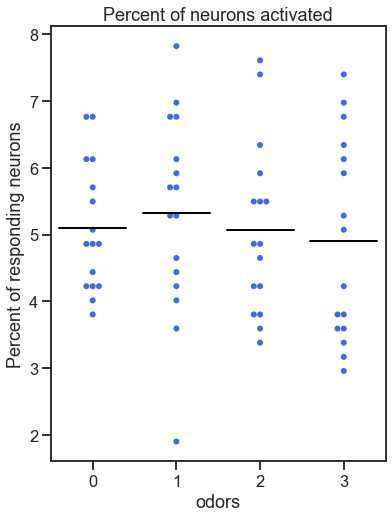

In [25]:
Array= Activecell_green3

plt.figure(figsize=(6,8))
sns.swarmplot(data=[d for d in Array.T], color="royalblue", size=6 )
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in Array.T],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.title('Percent of neurons activated')
plt.xlabel('odors')
plt.ylabel('Percent of responding neurons')
# plt.ylim(0,15)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "activatedcells_mPFC.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

(0.0, 15.0)

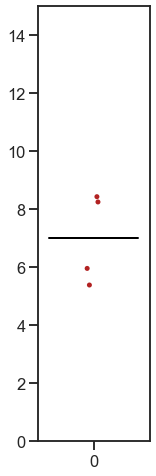

In [23]:
ActivecellsPmean=Activecell_green2.mean(0)
# ActivecellsPmean=Activecell_mPFC.flatten()
plt.figure(figsize=(2,8))
sns.stripplot(data=[d for d in ActivecellsPmean.T], color="firebrick")
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in ActivecellsPmean.T],
            showfliers=False,
            showbox=False,
            showcaps=False)

plt.ylim(0,15)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "activatedcells_OB_mean.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
ActivecellsPmean=ActivecellsP.flatten()

plt.figure(figsize=(2,8))
# sns.boxplot(data=[d for d in MaxAmplitudegreenf.T], color="mediumseagreen", saturation=1, width=0.15, linewidth=1)
sns.boxplot(data=[d for d in ActivecellsPmean.T], color="mediumpurple", saturation=1, width=0.4, linewidth=1, )
# sns.swarmplot(data=[d for d in MaxAmplitude.T], color=".25")
plt.title('Percent of neurons activated')
plt.xlabel('odors')
plt.ylabel('Percent of responding neurons')
plt.ylim(0,12)

FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "activatedcells_red_average.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
Activecell_mPFCmean = Activecell_mPFC.flatten()
Activecell_OBmean=Activecell_OB.flatten()
Activecell_greenmean=Activecell_green.flatten()
Activecell_redmean=Activecell_red.flatten()

In [ ]:
# Example of the Student's t-test
data1 = Activecell_OBmean
data2 = Activecell_greenmean
stat, p = ttest_ind(data1, data2, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

# Tuning

In [ ]:
tuningcurvesuppressed= TuningCurveSuppressed(array= Array, threshold=-1, trialthreshold=2)

tuningreliab, tuningreliabpercent= TuningReliabilityActivated(array=respsGreen, threshold=1)

In [ ]:
trialthreshold=2

tuningcurveactivatedgreen1= TuningCurveActivated(array= respsGreen1, threshold=1, trialthreshold=trialthreshold)
tuningcurveactivatedgreen2= TuningCurveActivated(array= respsGreen2, threshold=1, trialthreshold=trialthreshold)
tuningcurveactivatedgreen3= TuningCurveActivated(array= respsGreen3, threshold=1, trialthreshold=trialthreshold)

In [ ]:
'firebrick'
'mediumseagreen'
'royalblue'

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(tuningcurveactivatedgreen3,fill=True,color='mediumseagreen', bins=4, linewidth=10, binrange=(0,4), stat="probability")
plt.xlabel('Number of odorants')
plt.ylabel('percent responding neurons')
plt.ylim(0,0.7)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "Tuning_green_thresh_2.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
tuningreliab, tuningreliabpercent= TuningReliabilityActivated(array=respsGreen, threshold=1)

In [ ]:
# plt.figure(figsize=(2,8))
# sns.boxplot(data=[d for d in tuningreliabpercent.T], color='mediumseagreen', saturation=0.3, width=0.2, linewidth=1)
# sns.swarmplot(data=[d for d in tuningreliabpercent.T], color='.25')
# plt.xlabel('number of trials')
# plt.ylabel('percent responsive cell/odor')
# # plt.ylim(0,40)

plt.figure(figsize=(4,8))
sns.stripplot(data=[d for d in tuningreliabpercent.T], color="mediumseagreen",size=6)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in tuningreliabpercent.T],
            showfliers=False,
            showbox=False,
            showcaps=False)

plt.ylim(0,30)
FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "Tuning_green_trial_nozero.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

# Response Magnitude

In [ ]:
MaxAmplgreen = inputArrayForRespsGreen[:,:,:,23:45].max(axis=3)
MaxAmplred = inputArrayForRespsRed[:,:,:,23:45].max(axis=3)
MaxAmplOB = inputArrayForRespsOB[:,:,:,23:45].max(axis=3)
MaxAmplmPFC = inputArrayForRespsmPFC[:,:,:,23:45].max(axis=3)

MinAmplgreen = inputArrayForRespsGreen[:,:,:,23:45].min(axis=3)
MinAmplred = inputArrayForRespsRed[:,:,:,23:45].min(axis=3)
MinAmplOB = inputArrayForRespsOB[:,:,:,23:45].min(axis=3)
MinAmplmPFC = inputArrayForRespsmPFC[:,:,:,23:45].min(axis=3)

MaxAmplitudegreen=MaxAmplgreen.mean(axis=0)
MaxAmplitudered=MaxAmplred.mean(axis=0)
MaxAmplitudeOB=MaxAmplOB.mean(axis=0)
MaxAmplitudemPFC=MaxAmplmPFC.mean(axis=0)

MinAmplitudered=MinAmplred.mean(axis=0)
MinAmplitudegreen=MinAmplgreen.mean(axis=0)
MinAmplitudeOB=MinAmplOB.mean(axis=0)
MinAmplitudemPFC=MinAmplmPFC.mean(axis=0)

In [ ]:
MaxAmplitudegreenf = MaxAmplgreen.flatten()
MaxAmplituderedf = MaxAmplred.flatten()
MaxAmplitudeOBf = MaxAmplOB.flatten()
MaxAmplitudemPFCf = MaxAmplmPFC.flatten()

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=[d for d in MaxAmplituderedf.T], color="mediumpurple", saturation=1, width=0.4, linewidth=1, )
plt.title('Response Magnitude')
plt.xlabel('odors')
plt.ylabel('Z-score')
plt.ylim(-3,17)

FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "response_magnitude_red.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
Araay= DataArray_Green_mPFC
cellnum=150
odorID = 3
color=2

cellDataArray_Green=Araay[cellnum,:,odorID,:]
cellDataArray_Green=cellDataArray_Green.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=cellDataArray_Green)
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'firebrick')
# plt.axis('off')
# plt.ylim(-2,3)

In [ ]:
data = pd.read_excel(r'/Users/sdaste/Desktop/Book2.xlsx') #for an earlier version of Excel use 'xls'
df = pd.DataFrame(data, columns = ['Projection'])

In [ ]:
projection = df.pop("Projection")
lut = dict(zip(projection.unique(), "rbg"))
row_colors = projection.map(lut)

In [ ]:
row_colors.shape

In [ ]:
DataArray_All.shape

In [ ]:
odorID='β-Ionone'
Respmean = DataArray_All.mean(1)
Respmean_odor1 = Respmean[:,5,:] #second dimension is the odor id 
# Respmean_odor1 = Respmean.mean(1) #second dimension is the odor id 

cg = sns.clustermap(data=Respmean_odor1, col_cluster=False, metric="correlation",row_colors=row_colors.to_numpy(),cbar_pos=None, vmax=3)
cg.ax_row_dendrogram.set_visible(True)
plt.axvline(22.6, color = 'w')
plt.axvline(31.7, color = 'w')
plt.xlabel('frames')
plt.ylabel('cellID')
plt.title(odorID)

FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "Rastor_allcells_odor_5.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
#Calculate and plot the mean response for each cell for a particular odor. filteredDataArray_Fluo= cell x trials x odors x time
odorID = 3
odorName= ''
Array = DataArray_Red_all

rastorplotmeanresponse(Array, odornumber = odorID, odorID = odorName, vmin=-1 ,vmax=3)

In [ ]:
Array= DataArray_Green_all

odor = Array[...,30:45].mean(-1)
bline = Array[...,0:15].mean(-1)
respscorr= odor-bline
testcorrr=[]
numtrials=8
index = np.random.choice(respscorr.shape[0], 84, replace=False)
respcorrran=respscorr[index,:,:]
# correlogramm = np.corrcoef(respcorrran.transpose(0,2,1).reshape(respcorrran.shape[0],-1).T[:])
plt.figure(figsize=(15,15))
sns.heatmap(np.corrcoef(respscorr.transpose(0,2,1).reshape(respcorrran.shape[0],-1).T[:]), square = True, xticklabels=[], yticklabels=[])
for i in range(8):
	plt.axvline(numtrials*i+numtrials, color = 'w', linewidth = 1)
	plt.axhline(numtrials*i+numtrials, color = 'w', linewidth = 1)

In [ ]:
correlogram = correlogram(DataArray_Green_all, odorlow=30, odorup=45, blinelow=0, blineup=15, numtrials=8, numstim=8)

In [ ]:
MeanCorrMatrix= meanpool2d(correlogram, trialnum=8)

plt.figure(figsize=(15,15))
sns.heatmap(MeanCorrMatrix, square = True, xticklabels=[], yticklabels=[])
for i in range(10):
    plt.axvline(i, color = 'w', linewidth = 1)
    plt.axhline(i, color = 'w', linewidth = 1)

In [ ]:
correlogramOB = correlogram(DataArray_Red_OB, odorlow=30, odorup=45, blinelow=0, blineup=15, numtrials=8, numstim=8)

# CLASSIFIER

# Classifier - stimulus ID prediction

In [57]:
DataArray_Green_Day2.shape

(480, 16, 4, 100)

In [48]:
#True class for stimulus id prediction
Array = DataArray_Green_Day3
RespArray = respsGreen3

NumberOdor = 4
NumberTrials = 16

xx = np.arange(0,NumberOdor)
yy = np.ones((1,NumberTrials),dtype=np.int32)
zz = np.kron(xx,yy)
z = zz.transpose(1,0)

In [49]:
#Get Mean response arrays for each time window
inputArrayForRespsClass = Array.transpose(1,0,2,3)
stepsize = 3
respsbaserolling = []
for i in range (100):
    respsbase = MeanResp(inputArrayForRespsClass, numTrialsToKeep=16, win = [i,i+stepsize])
    respsbaserolling.append(respsbase[None])
respsbaserolling=np.concatenate(respsbaserolling,0)
respsbaserolling.shape

(100, 16, 473, 4)

In [50]:
#Rolling window array: Drop Controls and reshape trials x stim into one feature dimension 
respsbaseclas= respsbaserolling.transpose (3,1,2,0)
respsbaseclass = respsbaseclas.reshape(-1, respsbaseclas.shape[-2],respsbaseclas.shape[-1])
respsbaseclass.shape

(64, 473, 100)

In [51]:
#PostStimulus array: Reshape trials x stim into one feature dimension 
respsclas= RespArray.transpose (2,0,1)
respsclass = respsclas.reshape(-1, respsclas.shape[-1])
respsclass.shape

(64, 473)

In [52]:
X = respsclass
Xz = respsbaseclass
y= z
# np.random.shuffle(y)

In [53]:
y.shape

(64, 1)

In [54]:
# Grid Search
# parameters={
#     'C':[1,10,20, 30,40,50], 
#     'kernel':('linear', 'rbf', 'sigmoid'), 
#     'gamma': ('scale','auto'),
#     'class_weight':('balanced', None)
#     }

# rskf = RepeatedStratifiedKFold(n_splits=8, n_repeats=10)
# svc = svm.SVC()

# grid_search = GridSearchCV(svc, param_grid=parameters, cv=rskf)
# grid_search.fit(X,y)
# grid_search.best_params_

/Users/sdaste/anaconda3/envs/simon/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdaste/anaconda3/envs/simon/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdaste/anaconda3/envs/simon/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdaste/anaconda3/envs/simon/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Text(97.52000000000001, 0.5, 'presented stimulus')

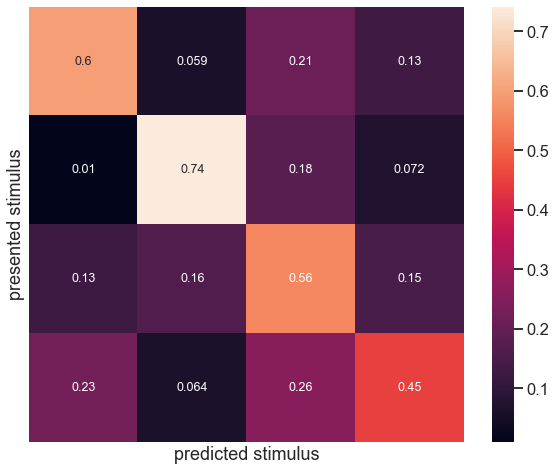

In [55]:
confusion, confusiond = ConfusionMatrix(X, y, n_splits=16, n_repeats=100, C=3, class_weight='balanced', gamma='scale', kernel='linear')

plt.figure(figsize=(10,8))
sns.heatmap(confusion, square = True, xticklabels=[], yticklabels=[], annot=True, annot_kws=dict(fontsize='x-small'))
plt.xlabel('predicted stimulus')
plt.ylabel('presented stimulus')

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "Confusion_Matrix_RedAll.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')



In [ ]:
#Same with pseudo population

pseudosize = 70
number_of_pseudo = 100

swinscore=[]
for l in range (number_of_pseudo):
    index = np.random.choice(X.shape[1], pseudosize, replace=False)  
    X_rand = X[:,index]
    confusion = ConfusionMatrix(X_rand, y, n_splits=NumberOdor, n_repeats=20)
    swinscore.append(confusion[None])
swinscore=np.concatenate(swinscore,0)
swinscoremean= swinscore.mean(0)

plt.figure(figsize=(10,8))
sns.heatmap(swinscoremean, square = True, xticklabels=[], yticklabels=[], annot=True, annot_kws=dict(fontsize='x-small'), vmax=0.5)
plt.xlabel('predicted stimulus')
plt.ylabel('presented stimulus')
# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/mPFC_DataSet/Analysis'
# path22 = os.path.join(FOLDER_PATH, "Confusion_Matrix2_Green64cells_400subpop_scale_mPFC.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
swinscore, swinnomeanscore= SVMslidewindow(X=X, Xz=Xz, y=y, Numslidewin= 100, n_splits= 16, n_repeats= 10)

plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'grey', linewidth=3, alpha=0.8)
plt.xlabel('time (sliding windows)')
plt.ylabel('Percent of classification accuracy')
plt.ylim(0,1.0)
plt.hlines(0.125,0,100, linestyles='dashed')
plt.vlines(23,0,1, color='r', alpha=0.3)
plt.vlines(32,0,1, color='r', alpha=0.3)

# Classifier - cell projection ID prediction

In [ ]:
numTrialsToKeep = 8
blinewin = [0,15]
odorwin = [23,45]

inputArrayForRespsRed = DataArray_Red_all.transpose(1,0,2,3)
respsRed = getRespsRegular(inputArrayForRespsRed, numTrialsToKeep=numTrialsToKeep, blinewin=blinewin, odorwin=odorwin)
inputArrayForRespsGreen = DataArray_Green_all.transpose(1,0,2,3)
# respsGreen = getRespsRegular(inputArrayForRespsGreen, numTrialsToKeep=numTrialsToKeep, blinewin=blinewin, odorwin=odorwin)
# respsRed = getRespsRegularnobsline(inputArrayForRespsRed, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)
respsGreen = getRespsRegularnobsline(inputArrayForRespsGreen, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

In [ ]:
d = np.full((70), 2, dtype=np.int32)

In [ ]:
index = np.random.choice(respsGreen.shape[1], 70, replace=False)  
Array2 = DataArray_Green_all[index,:,:,:]
RespArray2 = respsGreen[:,index,:]

In [ ]:
Array = np.concatenate((DataArray_Red_all,Array2), axis=0)
RespArray = np.concatenate((respsRed,RespArray2), axis=1)


In [ ]:
RespArray.shape

In [ ]:
#True class for cell projection id prediction
Array = DataArray_Red_all
RespArray = respsRed

popsize_1 = 68 #OB
popsize_2 = 84 #mPFC

a= np.zeros((popsize_1),dtype=np.int32) 
a= np.array(a)
b = np.ones([popsize_2],dtype=np.int32) 
b=np.array(b)

c= np.concatenate((a,b))
# c= np.concatenate((a,b,d))

In [ ]:
#Get Mean response arrays for each time window
inputArrayForRespsClass = Array.transpose(1,0,2,3)
stepsize = 10
respsbaserolling = []
for i in range (100):
    respsbase = MeanResp(inputArrayForRespsClass, numTrialsToKeep=8, win = [i,i+stepsize])
    respsbaserolling.append(respsbase[None])
respsbaserolling=np.concatenate(respsbaserolling,0)
respsbaserolling.shape

In [ ]:
#Rolling window array: Drop Controls and reshape trials x stim into one feature dimension 
respsbaseclas= respsbaserolling.transpose (3,1,2,0)
respsbaseclass = respsbaseclas.reshape(-1, respsbaseclas.shape[-2],respsbaseclas.shape[-1])
respsbaseclass.shape

In [ ]:
#PostStimulus array: Reshape trials x stim into one feature dimension 
respsclas= RespArray.transpose (2,0,1)
respsclass = respsclas.reshape(-1, respsclas.shape[-1])
respsclass.shape

In [ ]:
respsclasss= respsclass.transpose(1,0)
X = respsclasss
Xz = respsbaseclass
Xz = Xz.transpose(1,0,2)
y= c

In [ ]:
np.random.shuffle(y)

In [ ]:
n_splits=16
n_repeats=100

confusion, confusiond = ConfusionMatrix(X, y, n_splits=n_splits, n_repeats=n_repeats, C=20, class_weight=None, gamma='scale', kernel='rbf')

confusiond[0,:]=((confusiond[0,:]*100)/(68*n_repeats))
confusiond[1,:]=((confusiond[1,:]*100)/(84*n_repeats))
# confusiond[2,:]=((confusiond[2,:]*100)/(70*n_repeats))

confusiond=confusiond/100

plt.figure(figsize=(10,8))
sns.heatmap(confusiond, square = True, xticklabels=[], yticklabels=[], annot=True, annot_kws=dict(fontsize='x-small'), vmax=0.75, vmin=0.25)
plt.xlabel('predicted cell identity')
plt.ylabel('actual cell identity')

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "confusion_matrix_cellID_Red__shuffle.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
Numslidewin= 100
n_splits= 10
n_repeats= 5

swinscore=[]
meanscore = []
swinnomeanscore = []

for i in range(Numslidewin):
    scores = []
    svm_class = SVC(C=20, class_weight=None, gamma='scale', kernel='rbf')
    rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    for train_index, test_index in rskf.split(Xz, y):
        # X_train = X[train_index]
        X_train = Xz[:,:,i][train_index]
        X_test = Xz[:,:,i][test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        svm_class.fit(X_train, y_train)
        y_pred = svm_class.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred)[None])
    meanscore= np.mean(scores)
    swinscore.append(meanscore[None])
    swinnomeanscore.append(scores)
swinscore=np.concatenate(swinscore,0)
swinnomeanscore=np.concatenate(swinnomeanscore,1)

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'grey', linewidth=3, alpha=0.8)
plt.xlabel('time (sliding windows)')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.3,0.8)
plt.hlines(0.5,0,100, linestyles='dashed')
plt.vlines(23,0.3,0.8, color='b', alpha=0.3)
plt.vlines(31,0.3,0.8, color='b', alpha=0.3)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "confusion_matrix_cellID_85_95_sliding.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
# Grid Search

# new cell for grid search
from sklearn.model_selection import GridSearchCV
parameters={
    'C':[1,10,20, 30,40,50], 
    'kernel':('linear', 'rbf', 'sigmoid'), 
    'gamma': ('scale','auto'),
    'class_weight':('balanced', None)
    }

rskf = RepeatedStratifiedKFold(n_splits=20, n_repeats=10)
svc = svm.SVC()
# svc = svm.SVC(kernel='linear', class_weight = 'balanced', gamma='scale')

grid_search = GridSearchCV(svc, param_grid=parameters, cv=rskf)
# X = scaler.fit_transform(X)
# X = scaler.transform(X)
grid_search.fit(X,y)
grid_search.best_params_

In [ ]:
swinscore, swinnomeanscore= SVMslidewindow(X=X, Xz=Xz, y=y, Numslidewin= 100, n_splits= 2, n_repeats= 10)

plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'grey', linewidth=3, alpha=0.8)
plt.xlabel('time (sliding windows)')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0,1.0)
plt.hlines(0.5,0,100, linestyles='dashed')
plt.vlines(23,0.4,0.6, color='r', alpha=0.3)
plt.vlines(32,0.4,0.6, color='r', alpha=0.3)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "SVM_Sliding_all_mPFC_OB_2032cells.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
#             edgecolor='k')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(16, 12))
ax = Axes3D(fig, elev=-150, azim=50)
X_reduced = PCA(n_components=5).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=100)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(xmin=-2, xmax=2)
ax.set_ylim3d(ymin=-2, ymax=2)
ax.set_zlim3d(zmin=-2, zmax=2)
# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/OB_dataset_Analysis/Analysis_All_Mice/202012/Odor_Set_2'
# path22 = os.path.join(FOLDER_PATH, "PCA_Red.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

# X = iris.data
# y = iris.target
target_names = iris.target_names

pca = PCA(n_components=5)
X_r = pca.fit(X).transform(X)

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()

# Run SVM with random selection of cells

In [ ]:
DataArray_Green_Day2.shape

In [ ]:
swintestt=[]
swintest =[]

for l in range (100): #l is the number of time to randomize the cell population
    swintest.append(SVMrandselectcells (X=X, y=y, numcells=258, n_splits=16, n_repeats=10)[None])
swintestt=np.concatenate(swintest,0)

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=swintestt.mean(0), color = 'rosybrown')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0,0.8)
# plt.hlines(0.125,0,924, linestyles='dashed')

In [ ]:
swintesttmPFC= swintestt

In [ ]:
swintesttmPFCC = swintesttmPFC.transpose(1,0)
swintesttOBB = swintesttOB.transpose(1,0)

In [ ]:

# swintesttGreen = swintesttGreen.transpose(1,0)
# swintesttRedd = swintesttRed.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=swintesttGreen)
dataframe2 = PlotMeanwConfidence(array=swintesttRedd)
dataframe3 = PlotMeanwConfidence(array=swintesttOBB)
dataframe4 = PlotMeanwConfidence(array=swintesttmPFCC)
plt.figure(figsize=(10,8))
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'mediumseagreen')
sns.lineplot(x="x", y="Dff", data=dataframe2, color = 'mediumpurple')
sns.lineplot(x="x", y="Dff", data=dataframe3, color = 'firebrick')
sns.lineplot(x="x", y="Dff", data=dataframe4, color = 'royalblue')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.1,0.50)
# plt.xlim(0,80)
plt.hlines(0.125,0,152, linestyles='dashed')
FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "SVM_pop_Greenall_purplemPFCOB_redOB_bluemPFC.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
swintesttGreenn = swintesttRed.transpose(1,0)
swintesttRedd = swintesttGreen.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=swintesttGreenn)
dataframe2 = PlotMeanwConfidence(array=swintesttRedd)
plt.figure(figsize=(10,8))
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'mediumseagreen')
sns.lineplot(x="x", y="Dff", data=dataframe2, color = 'firebrick')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.1,0.30)
plt.hlines(0.11,0,30, linestyles='dashed')
FOLDER_PATH = '/Volumes/Extreme Pro/DATA/2P/20210427_Exp_Conc/#644/analysis/Results'
path22 = os.path.join(FOLDER_PATH, "SVM_pop_Green_Red.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
resps_LS = respsGreen.transpose(2,1,0)
LS_list = getLS(resps_LS, No=8)
plot = sns.histplot(LS_list, bins = 10,fill=True,color='mediumseagreen',linewidth=2, stat='probability')
# plt.title('Lifetime Sparseness')
plt.xlabel('Lifetime Sparseness')
plt.ylabel('Fraction of Neurons')
# plt.xlim(0,1)
plt.ylim(0,0.35)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "LS_green_hist.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(4,8))
sns.swarmplot(data=[d for d in LS_list.T], color="mediumseagreen",size=4)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in LS_list.T],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.ylim(0,1.05)
FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "LS_green_plot.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
sns.boxplot(data=[d for d in LS_list.T], color="mediumpurple", saturation=1, width=0.1, linewidth=3, )

In [ ]:
PS1 = getPS_abs(respsmPFC, No=8)
PS2 = getPS_abs(respsOB, No=8)
PS3 = getPS_abs(respsRed, No=8)
PS4 = getPS_abs(respsGreen, No=8)
sns.kdeplot(PS1, color = 'b') 
sns.kdeplot(PS2, color = 'r') 
sns.kdeplot(PS3, color = 'rosybrown') 
sns.kdeplot(PS4, color = 'g') 

In [ ]:
PS = PS1
plt.figure(figsize=(4,8))
sns.swarmplot(data=[d for d in PS.T], color="royalblue",size=4)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in PS.T],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.ylim(0,1)
FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "PS_mPFC_plot.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')